In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Problems 1

In [2]:
# Read the data into a DataFrame
djia = pd.read_csv("DJIA.csv", index_col = "DATE")
djia.sample(5)

,VALUE
DATE,
2012-03-07,12837.33
2014-08-11,16569.98
2006-11-17,12342.56
2015-03-13,17749.31
2016-03-15,17251.53


In [3]:
# DatetimeIndex
djia.index = pd.to_datetime(djia.index)

# Drop rows with missing values
djia = djia.drop(djia[djia['VALUE'] == "." ].index)

# cast the "VALUES" column to floats
djia = djia.astype(dtype=np.float64)

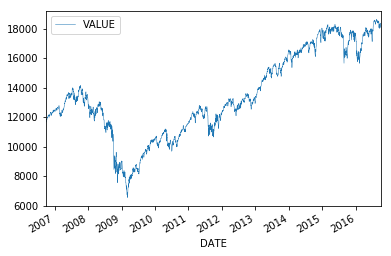

In [4]:
djia.plot(y="VALUE", lw=.5) 
plt.show()

## Problems 2

In [5]:
paychecks = pd.read_csv("paychecks.csv",header=None)
paychecks.columns=['values']
paychecks.sample(5)

,values
29,999.56
69,1126.08
7,992.83
36,1015.99
64,910.10


In [6]:
date1 = pd.date_range(start = '3/13/2008', periods = 47, freq = "WOM-1FRI")
date2 = pd.date_range(start = '3/13/2008', periods = 47, freq = "WOM-3FRI")
date = date1.union(date2)[0:93]

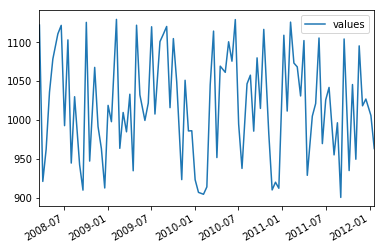

In [7]:
paychecks.index = date
paychecks.plot(y='values') 
plt.show()

## Problems 5

In [8]:
print(np.argmax((djia - djia.shift(1))['VALUE'][1:]))
print(max((djia - djia.shift(1))['VALUE'][1:]))

2008-10-13 00:00:00
936.4200000000001


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [9]:
print(np.argmin((djia - djia.shift(1))['VALUE'][1:]))
print(min((djia - djia.shift(1))['VALUE'][1:]))

2008-09-29 00:00:00
-777.6799999999985


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


In [10]:
mdjia = djia.resample('BMS').first()

In [11]:
print(np.argmax((mdjia - mdjia.shift(1))['VALUE'][1:]))
print(max((mdjia - mdjia.shift(1))['VALUE'][1:]))

2015-11-02 00:00:00
1556.7499999999982


In [12]:
print(np.argmin((mdjia - mdjia.shift(1))['VALUE'][1:]))
print(min((mdjia - mdjia.shift(1))['VALUE'][1:]))

2015-09-01 00:00:00
-1539.8500000000004


## Problems 6

Text(0.5, 1.0, 'Window 365')

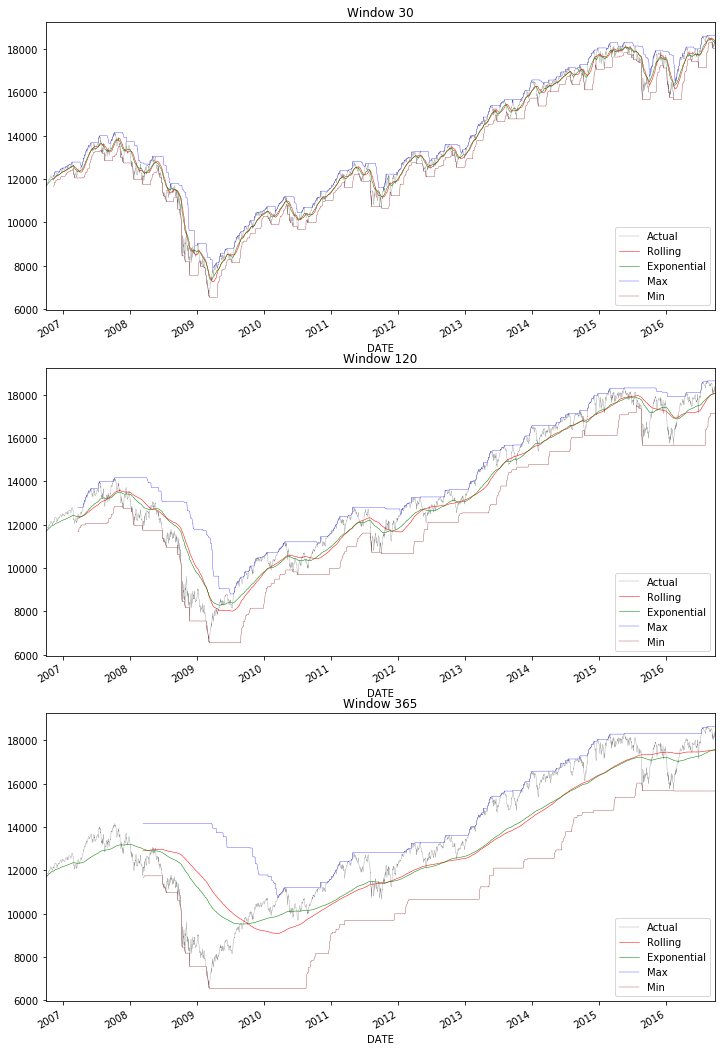

In [13]:
plt.subplots(3, 1, figsize=[12,20],sharex='col', sharey='row')
ax1 = plt.subplot(311)
djia.plot(color="gray", lw=.3, ax=ax1)
djia.rolling(window=30).mean().plot(color='r', lw=.5, ax=ax1)
djia.ewm(span=30).mean().plot(color='g', lw=0.5, ax=ax1)
djia.rolling(window=30).max().plot(color='b', lw=.3, ax=ax1)
djia.rolling(window=30).min().plot(color='maroon', lw=.3, ax=ax1)
ax1.legend(["Actual", "Rolling","Exponential","Max","Min"], loc="lower right")
ax1.set_title("Window 30")

ax2 = plt.subplot(312)
djia.plot(color="gray", lw=.3, ax=ax2)
djia.rolling(window=120).mean().plot(color='r', lw=.5, ax=ax2)
djia.ewm(span=120).mean().plot(color='g', lw=0.5, ax=ax2)
djia.rolling(window=120).max().plot(color='b', lw=.3, ax=ax2)
djia.rolling(window=120).min().plot(color='maroon', lw=.3, ax=ax2)
ax2.legend(["Actual", "Rolling","Exponential","Max","Min"], loc="lower right")
ax2.set_title("Window 120")

ax3 = plt.subplot(313)
djia.plot(color="gray", lw=.3, ax=ax3)
djia.rolling(window=365).mean().plot(color='r', lw=.5, ax=ax3)
djia.ewm(span=365).mean().plot(color='g', lw=0.5, ax=ax3)
djia.rolling(window=365).max().plot(color='b', lw=.3, ax=ax3)
djia.rolling(window=365).min().plot(color='maroon', lw=.3, ax=ax3)
ax3.legend(["Actual", "Rolling","Exponential","Max","Min"], loc="lower right")
ax3.set_title("Window 365")